## **Анализ оттока клиентов банка (поиск инсайтов, составление рекомендаций стейкхолдерам**)

In [ ]:
# импортируем библиотеки.
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
url='https://drive.google.com/file/d/1BY45f1IBSEYuPB3DWiFNXkAjdupIa84h/view?usp=drive_link'
path_url='https://drive.google.com/uc?id=' + url.split('/')[-2] #указывает на изображение + уникальный идентификатор файла
df = pd.read_csv(path_url)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


### **Проверка данных на корректность  и изменение данных**

In [ ]:
# выведем на экран информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

**RowNumber** - номер строки  - int64   
**CustomerId** - ID клиента - int64    
**Surname** - фамилия клиента - object    
**CreditScore** - кредитный рейтинг - int64    
**Geography** - местоположение  - object    
**Gender** - пол клиента - object    
**Age** - возраст клиента - int64    
**Tenure** - сколько лет клиент пользуется услугами банка - int64    
**Balance** - баланс на счетах клиента в банке - float64    
**NumOfProducts** - количество услуг банка, которые приобрел клиент - int64    
**HasCrCard** - есть ли у клиента кредитная карта (1 — да, 0 — нет) - int64    
**IsActiveMember** - есть ли у клиента статус активного клиента банка (1 — да, 0 — нет) - int64    
**EstimatedSalary** - предполагаемая заработная плата клиента - float64    
**Exited** - статус лояльности (1 — ушедший клиент, 0 — лояльный клиент) - int64   
**Complain** - у клиента есть жалоба или нет (1 — есть, 0 — нет) - int64    
**Satisfaction Score** - оценка, предоставляемая клиентом за разрешение его жалобы - int64    
**Card Type** - тип карты, которой владеет клиент - object    
**Points Earned** - баллы, заработанные клиентом за использование кредитной карты - int64



*Видим что название столбцов и тип данных в столбцах адекватен, поэтому переходим к следующему этапу*

In [ ]:
#проверяем на корректность данных
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


*Некорректных значений в данных нет*

In [ ]:
#проверяем данные на пропуски
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


*Пропусков в данных нет*

*Проверка на наличие дубликатов*
-полное значение дубликатов<br>
-отдельно проверим на наличие дубликатов в столбце CustomerId , где все значения должны быть уникальными<br>
-проверка на неявные дубликаты в столбцах с категориальными переменными<br>
-проверка столбцов с бинарными значениями 0 и 1:

In [ ]:
#Полное значение дубликатов
df.duplicated().sum()

np.int64(0)

In [ ]:
#отдельно проверим на наличие дубликатов в столбце CustomerId , где все значения должны быть уникальными
df['CustomerId'].duplicated().sum()

np.int64(0)

*Дубликатов нет*

In [ ]:
#проверка на неявные дубликаты в столбце 'Geography'
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#проверка на неявные дубликаты в столбце 'Gender'
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

*Категориальные данные корректны*

In [ ]:
#проверка столбцов с бинарными значениями  'HasCrCard'
df['HasCrCard'].unique()

array([1, 0])

In [ ]:
#проверка столбцов с бинарными значениями  'IsActiveMember'
df['IsActiveMember'].unique()

array([1, 0])

In [ ]:
#проверка столбцов с бинарными значениями  'Exited'
df['Exited'].unique()

array([1, 0])

In [ ]:
#проверка столбцов с бинарными значениями  'Complain'
df['Complain'].unique()

array([1, 0])

*Бинарные значения корректны*

**Проверка на выбросы**

In [ ]:
#проверяем данные на выбросы
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


*После проверки данных замечаю что есть выбросы в столбцах Age, EstimatedSalary*

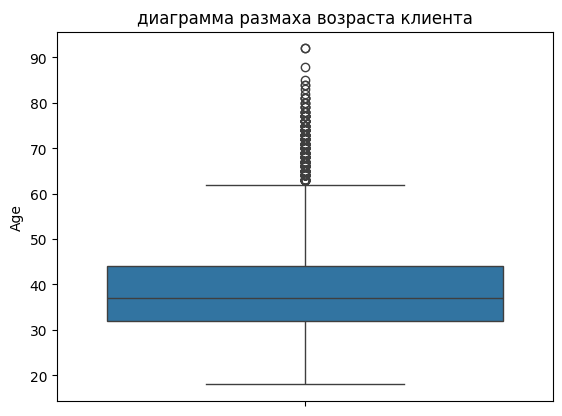

In [ ]:
#Визуализация  выбросов по столбцу 'Age'
sns.boxplot(df['Age'])
plt.title("диаграмма размаха возраста клиента")
plt.show()

*На графике наблюдаем выбросы, дополнительно посмотрим кол-во данных их значимость*

In [ ]:
#выводим данные выбросов по столбцу 'Age'
df[df['Age']>62]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
58,59,15623944,T'ien,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1,1,5,SILVER,549
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0,0,5,DIAMOND,651
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1,1,2,GOLD,915
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0,0,1,PLATINUM,250
181,182,15789669,Hsia,510,France,Male,65,2,0.00,2,1,1,48071.61,0,0,1,SILVER,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0,0,2,DIAMOND,430
9765,9766,15777067,Thomas,445,France,Male,64,2,136770.67,1,0,1,43678.06,0,0,3,DIAMOND,650
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1,1,3,GOLD,808
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0,0,4,DIAMOND,366


*Данные для меня являются значимыми поэтому удалять я их не буду*

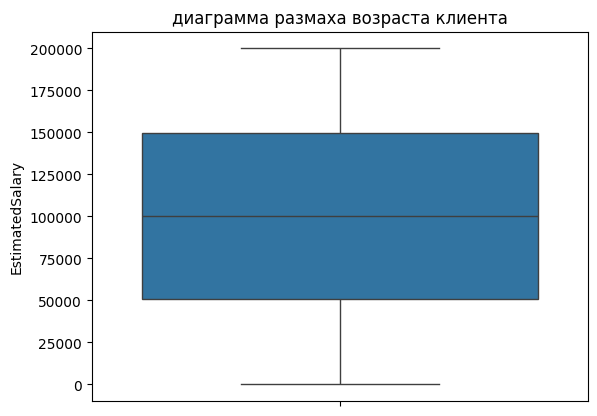

In [ ]:
#Визуализация  выбросов по столбцу 'EstimatedSalary'
sns.boxplot(df['EstimatedSalary'])
plt.title("диаграмма размаха возраста клиента")
plt.show()

*На графике выбросы не показываются, но минимальное значение мне не нравится, Посмотрим значение в отсортированном виде и как сильно отличается от соседних чисел*

In [ ]:
#сделаем сортировку по столбцу 'EstimatedSalary'
df_sorted = df.sort_values('EstimatedSalary')
df_sorted['EstimatedSalary']

,EstimatedSalary
2362,11.58
9647,90.07
9010,91.75
5548,96.27
4989,106.67
...,...
8926,199909.32
9096,199929.17
4417,199953.33
3580,199970.74


*Видим что минимальное значение достаточно далеко лежит от соседнего число это можно считать выбросом. Посмотрим все значения пользователя*

In [ ]:
df[df['EstimatedSalary']<12]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1,1,5,GOLD,254


*Можем сказать что данные ошибочно введены. По данным  пользователя  видим что он уже давно является клиентом банка Кредитный рейтинг - хороший, баланс на счете  выше среднего.*

*Данные для меня не являются значимыми поэтому удалим их*

In [ ]:
#Удалим строку с выбросами
df = df[df['EstimatedSalary']!=11.58]
logistic_Regression = df.copy()
corel = df.copy()#сохраним данные для корреляционной диаграммы

In [ ]:
#проверим данные
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.763776,1.569093e+07,650.522952,38.921192,5.012901,76481.245642,1.530253,0.705471,0.515052,100100.248748,0.203720,0.204320,3.013601,606.550355
std,2886.919535,7.193282e+04,96.656363,10.488155,2.892301,62398.797596,0.581659,0.455854,0.499798,57504.658260,0.402784,0.403224,1.405849,225.908627
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,1.000000,119.000000
25%,2501.500000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51013.655000,0.000000,0.000000,2.000000,410.500000
50%,5001.000000,1.569073e+07,652.000000,37.000000,5.000000,97188.620000,1.000000,1.000000,1.000000,100200.400000,0.000000,0.000000,3.000000,605.000000
75%,7500.500000,1.575322e+07,718.000000,44.000000,7.000000,127646.040000,2.000000,1.000000,1.000000,149392.065000,0.000000,0.000000,4.000000,801.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


**вывод:**  
Удалили одного пользователя, остальные данные в пределах нормы.

##### **Построим две гистограммы одна будет по возрасту клиентов другая по по возрасту ушедших клиентов**

 **гистограмма всех пользователей пользователей по возрасту**

<Axes: xlabel='Age'>

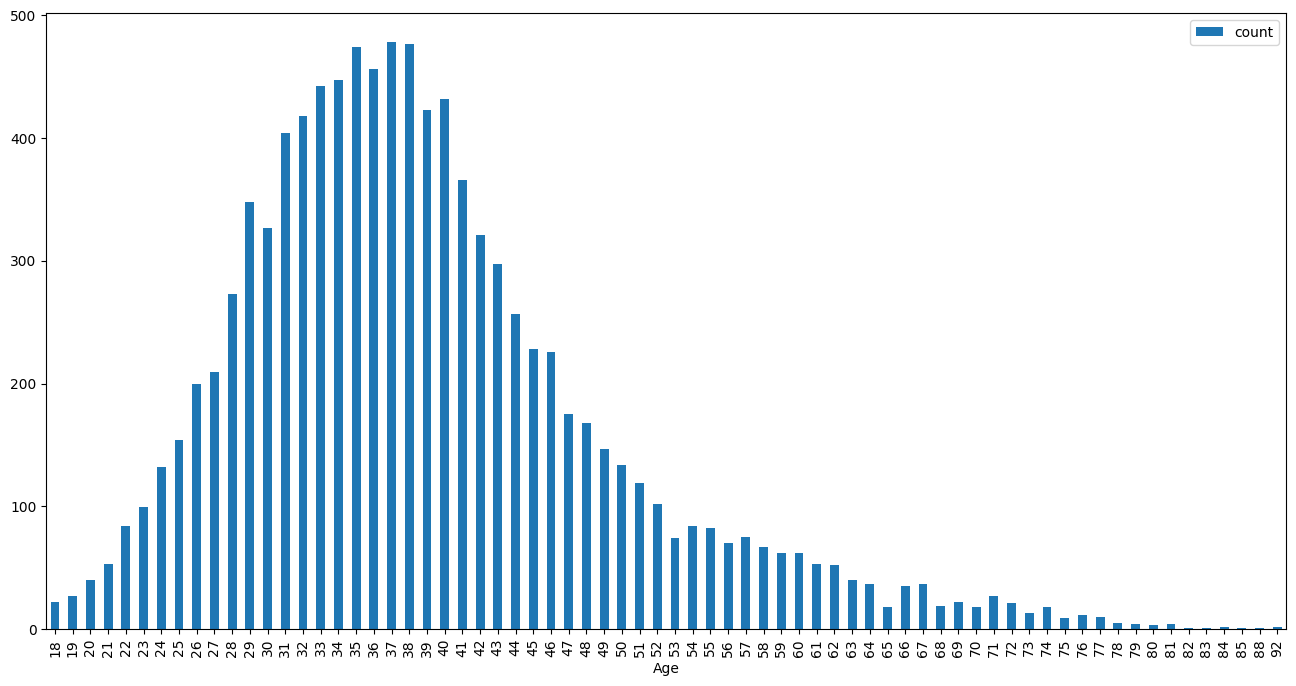

In [ ]:
df['Age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).sort_values('Age').plot(kind='bar', figsize = (16,8), x = 'Age', y = 'count')

вывод: (положительное отклонение)  распределение с отклонением в право

**гистограмма пользователей которые ушли из банка по возрасту**

<Axes: xlabel='Age'>

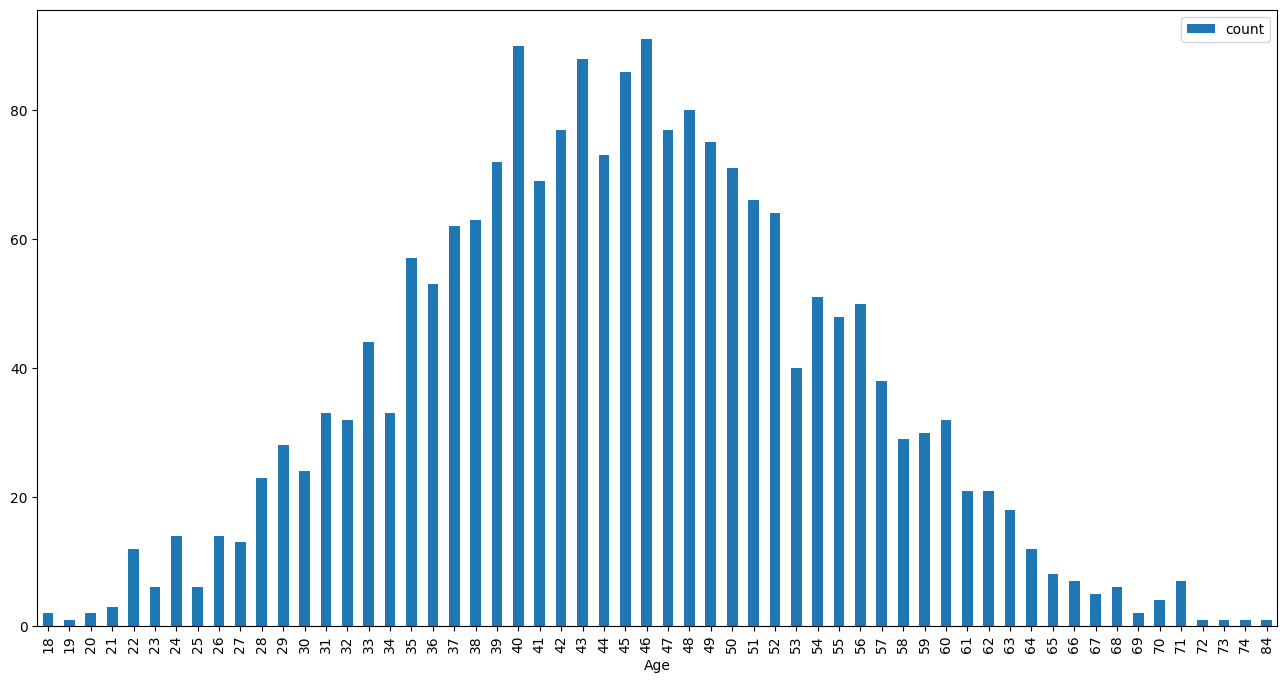

In [ ]:
#строим гистограмму ушедших клиентов
df[df['Exited']==1]['Age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).sort_values('Age').plot(kind='bar', figsize = (16,8), x = 'Age', y = 'count')

вывод: видим что данные нормально распределены явных выбросов нет

**вывод по двум графикам:**   
На первом графике мы видили распределение с отклонением в право
на втором графике данные распределены нормально.
Можно сказать что у ушедших людей есть связь с возрастом


#### **Сгруппируем клиентов по возрасту и посмотрим на их показатели**

In [ ]:
#анным по которым будем  производить возрастные группы
data = df[df['Exited']==1]['Age']
data.describe()

,Age
count,2037.000000
mean,44.835542
std,9.762149
min,18.000000
25%,38.000000
50%,45.000000
75%,51.000000
max,84.000000


Очень разные  паттерны оттока на гистограмме и данными выше (75% - max,  min - 25%)   поэтому будем разбивать гистограмму визуально на 4 группы
- 1 группа 18 - 34 лет
- 2 группа 35 - 44 лет
- 3 группа 45 - 57 лет
- 4 группа 58 - 84 лет

In [ ]:
# создаем  функцию age_group для группировки :
def Age_group(age):
    if 35> age >= 18: # условие -  группа людей от 18 - 34
        return '1'
    if 45 >= age >= 35: # условие -  группа людей от 35 - 44
        return '2'
    if 58 >= age >= 45: # условие -  группа людей от 45 - 57
        return '3'
    if 58 <= age: # условие -  группа людей старше 58
        return '4'

In [ ]:
# обращаемся к функции для групировки
df['Age_group'] = df['Age'].apply (Age_group) # создаем новый столбец в таблице с названием (Age_group) в ней будут групировки с названием (1,2,3,4) людей по возрасту
cs = df[df['Exited']==1].copy()#создадим отдельную таблицу с ушедшими пользователями
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,2


Проверим людей по группам и посмотрим разницу     
**1 группа 18 - 34 лет**           
состовляет 14.5% от общего числа ушедших людей

In [ ]:
cs[cs['Age_group'] == '1'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,290.000000,2.900000e+02,290.000000,290.000000,290.000000,290.00000,290.000000,290.000000,290.000000,290.000000,290.0,290.000000,290.000000,290.000000
mean,5037.117241,1.568886e+07,650.703448,29.510345,5.034483,94453.71531,1.441379,0.710345,0.375862,102995.207655,1.0,0.996552,2.975862,612.537931
std,2874.468088,7.078203e+04,99.764784,3.740949,2.813496,60257.09859,0.765844,0.454386,0.485182,58071.076178,0.0,0.058722,1.410331,221.468019
min,8.000000,1.556650e+07,363.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000,582.590000,1.0,0.000000,1.000000,219.000000
25%,2663.000000,1.562823e+07,589.250000,27.250000,3.000000,41225.93250,1.000000,0.000000,0.000000,55090.517500,1.0,1.000000,2.000000,432.250000
50%,5088.000000,1.568874e+07,654.500000,30.000000,5.000000,112356.17000,1.000000,1.000000,0.000000,103310.350000,1.0,1.000000,3.000000,613.000000
75%,7578.500000,1.575106e+07,720.750000,33.000000,7.000000,135615.22500,2.000000,1.000000,1.000000,154550.965000,1.0,1.000000,4.000000,803.250000
max,9961.000000,1.581221e+07,850.000000,34.000000,10.000000,210433.08000,4.000000,1.000000,1.000000,199725.390000,1.0,1.000000,5.000000,995.000000


In [ ]:
round(((290 / 2000) *100), 1)

14.5

**2 группа 35 - 44 лет**    
состовляет 39.5% от общего числа ушедших людей

In [ ]:
cs[cs['Age_group'] == '2'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,790.000000,7.900000e+02,790.000000,790.000000,790.000000,790.000000,790.000000,790.00000,790.000000,790.000000,790.0,790.000000,790.000000,790.000000
mean,4795.877215,1.568993e+07,644.787342,40.415190,4.969620,91678.780354,1.522785,0.71519,0.353165,99995.967228,1.0,0.998734,2.982278,599.716456
std,2899.874142,7.451557e+04,97.740443,3.084328,2.966495,58199.970115,0.825059,0.45161,0.478256,58198.931803,0.0,0.035578,1.412309,227.379424
min,1.000000,1.556571e+07,350.000000,35.000000,0.000000,0.000000,1.000000,0.00000,0.000000,236.450000,1.0,0.000000,1.000000,219.000000
25%,2264.000000,1.562690e+07,579.250000,38.000000,2.000000,47916.520000,1.000000,0.00000,0.000000,49743.777500,1.0,1.000000,2.000000,392.500000
50%,4745.500000,1.569000e+07,647.000000,40.000000,5.000000,109175.310000,1.000000,1.00000,0.000000,100852.825000,1.0,1.000000,3.000000,608.000000
75%,7381.750000,1.575531e+07,712.750000,43.000000,8.000000,132244.277500,2.000000,1.00000,1.000000,148792.427500,1.0,1.000000,4.000000,790.000000
max,9999.000000,1.581566e+07,850.000000,45.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199808.100000,1.0,1.000000,5.000000,1000.000000


In [ ]:
round(((790 / 2000) *100), 1)

39.5

**3 группа 45 - 57 лет**     
состовляет 39% от общего числа ушедших людей

In [ ]:
cs[cs['Age_group'] == '3'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,780.000000,7.800000e+02,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0,780.000000,780.000000,780.000000
mean,4966.469231,1.568984e+07,643.794872,50.930769,4.875641,89348.361013,1.444872,0.676923,0.366667,103109.636654,1.0,0.997436,3.017949,602.612821
std,2835.991856,7.187454e+04,102.685801,3.597935,2.958189,58263.469612,0.801659,0.467952,0.482204,57097.420092,0.0,0.050604,1.382890,226.091036
min,17.000000,1.556638e+07,350.000000,46.000000,0.000000,0.000000,1.000000,0.000000,0.000000,123.070000,1.0,0.000000,1.000000,163.000000
25%,2461.250000,1.562782e+07,570.000000,48.000000,2.000000,0.000000,1.000000,0.000000,0.000000,54884.907500,1.0,1.000000,2.000000,404.750000
50%,4930.500000,1.568699e+07,643.500000,50.000000,5.000000,108363.585000,1.000000,1.000000,0.000000,104252.235000,1.0,1.000000,3.000000,610.500000
75%,7311.000000,1.575141e+07,717.250000,54.000000,8.000000,128890.610000,2.000000,1.000000,1.000000,153558.797500,1.0,1.000000,4.000000,791.250000
max,9992.000000,1.581532e+07,850.000000,58.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,198874.520000,1.0,1.000000,5.000000,1000.000000


In [ ]:
round(((780 / 2000) *100), 1)

39.0

**4 группа 58 - 84 лет**    
состовляет 8.8% от общего числа ушедших людей

In [ ]:
cs[cs['Age_group'] == '4'].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.0,177.000000,177.000000
mean,4958.288136,1.569298e+07,646.327684,62.813559,4.881356,90670.389153,1.457627,0.706215,0.338983,99357.297175,1.0,1.0,3.000000,622.384181
std,2867.121191,7.125113e+04,102.941151,3.889706,2.931518,56474.860881,0.745944,0.456787,0.474707,60035.201090,0.0,0.0,1.402109,218.540248
min,59.000000,1.556998e+07,350.000000,59.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.750000,1.0,1.0,1.000000,244.000000
25%,2660.000000,1.563514e+07,578.000000,60.000000,2.000000,47020.650000,1.000000,0.000000,0.000000,41815.220000,1.0,1.0,2.000000,430.000000
50%,4644.000000,1.569178e+07,637.000000,62.000000,5.000000,110368.030000,1.000000,1.000000,0.000000,101240.080000,1.0,1.0,3.000000,613.000000
75%,7630.000000,1.575251e+07,727.000000,64.000000,8.000000,131583.590000,2.000000,1.000000,1.000000,154002.020000,1.0,1.0,4.000000,829.000000
max,9880.000000,1.581563e+07,850.000000,84.000000,10.000000,185966.640000,4.000000,1.000000,1.000000,198446.910000,1.0,1.0,5.000000,982.000000


In [ ]:
round(((177 / 2000) *100), 1)

8.8

- 2 и 3 группа занимает большую часть всех клиентов которые ушли из банка
- по средним показателям у всех групп приблизительно одинаково
- жалобы имеет каждый ушедший клиент

#### **Построим графики по важным показателям которые меня заинтересовали в данном исследовании**
- age возраст
- balanse клиента
- isActiveMember статус активного клиента
- Complain жалобы клиентов
- NumOfProducts кол-во услуг в банке  

В конце посмотрим корреляционную диаграмму чтобы убедиться в взаимосвязи данных по которым будем производить визуализацию

**Визуально посмотрим соотношение лояльных и ушедших клиентов, а также соотношения ухода женщин и мужчин**

Text(0.5, 1.0, 'Соотношение лояльных и ушедший клиентов в долях')

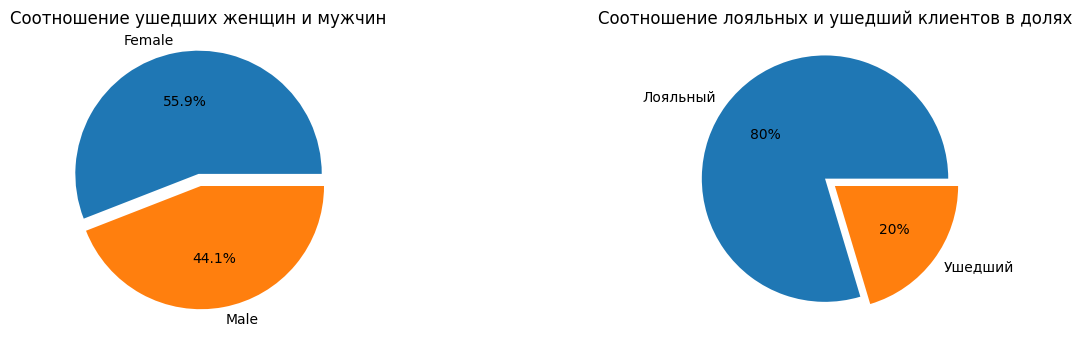

In [ ]:
df['Exited'] = df['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')# поменяем значения 1 и 0 на Ушедший и лояльный для построения графиков

#exited = df.groupby(by='Exited',as_index=False)['CustomerId'].count()#Группировка данных по столбцу «Exited», Подсчёт уникальных значений
gone = df[df['Exited'] == 'Ушедший']['Gender'].value_counts()# Подсчёт уникальных значений

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].pie(
    x=gone,
    labels =  gone.index,
    autopct = '%.1f%%',#округление до первого знака после запятой
    explode = [0.1,0.0]#доля смещения от центра
)
axes[0].set_title("Соотношение ушедших женщин и мужчин ")

exited_pie = df.groupby(by='Exited')['CustomerId'].count()#данные o соотношении клиентов
axes[1].pie(
    exited_pie,
    labels = exited_pie.index,
    autopct = '%.0f%%',#округление до первого знака после запятой
    explode = [0.1,0.0]#доля смещения от центра
);
axes[1].set_title("Соотношение лояльных и ушедший клиентов в долях")

- соотношение женщин и мужчин нормальное
- соотношение лояльных и ушедших  клиентов банка 1к4

**1 График возраста**

In [ ]:
#
fig_4 = px.box(
    data_frame=df,
    x='Age',
    y='Exited',
    orientation='h'
)
fig_4

- на графики видно что у ушедших клиентов меньше выбросов это говорит о том что есть  связь с возрастом

**2 график баланса на счете клиента**

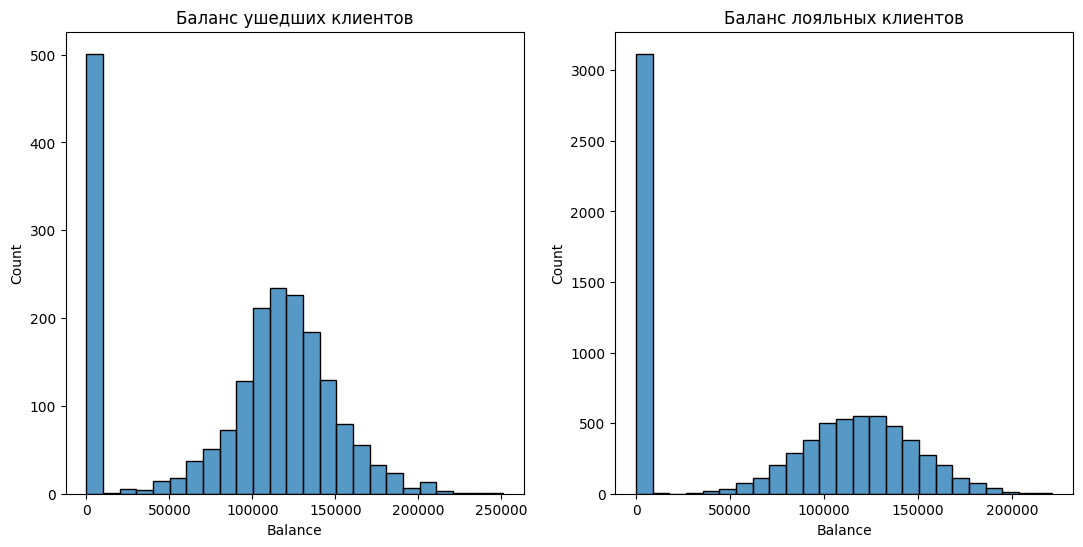

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,6))# создаём сетку из двух подграфиков  с размером фигуры (13×6)
sns.histplot(
    data=df[df['Exited']=='Ушедший'],
    x='Balance',
    bins=25,
    ax=axes[0]
);
axes[0].set_title("Баланс ушедших клиентов");
sns.histplot(
    data=df[df['Exited']=='Лояльный'],
    x='Balance',
    bins=25,
    ax=axes[1]
);
axes[1].set_title("Баланс лояльных клиентов");

In [ ]:
a = (df[df['Exited'] == 'Ушедший'])['Balance'].sum()
b = (df[df['Exited'] == 'Лояльный'])['Balance'].sum()
(((b - a) / b) * 100).round()

np.float64(68.0)

- Баланс ушедших клиентов отличается от баланса лояльных клиентов по графикам выше мы знаем доля ушедших клиентов (20%) а баланс ушедших  (32%) у ушедших клиентов было больше средств на счетах. Можно сказать что уход связан с невыгодными условиями банка по счету для хранения больших сумм. Еще можно добавить что такой сегмент людей пришел в банк для заработка на более выгодных условиях но со временем условия в других банках стали выгоднее

**3 isActiveMember статус активного клиента**

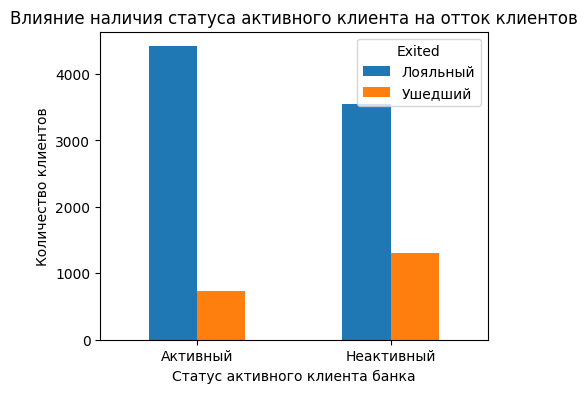

In [ ]:
df['IsActiveMember'] = df['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный')# поменяем значения 1 и 0 на Активный и Неактивный для построения графиков
pivot_2 = df.pivot_table(
    'CustomerId',
    index='IsActiveMember',
    columns='Exited',
    aggfunc='count'
)

fig_8, axes_8 = plt.subplots(figsize=(5,4))# Создание области для рисунка и осей
pivot_2.plot(
    kind='bar',
    ax=axes_8
);
axes_8.set_title('Влияние наличия статуса активного клиента на отток клиентов');
axes_8.set_xlabel('Cтатус активного клиента банка');
axes_8.set_ylabel('Количество клиентов');
axes_8.xaxis.set_tick_params(rotation=360)

- в статус активного клиента меньше происходит отток.

**4 Complain жалобы клиентов**

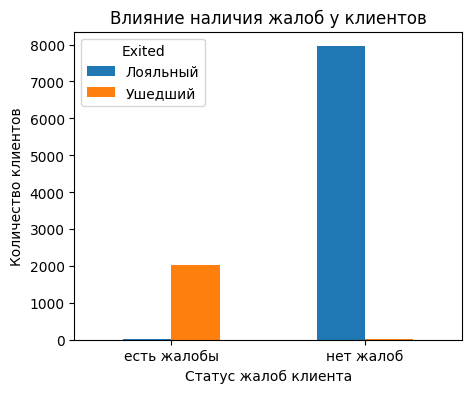

In [ ]:
df['Complain'] = df['Complain'].apply(lambda x: 'нет жалоб' if x == 0 else 'есть жалобы')# поменяем значения 1 и 0 на есть жалобы и нет жалоб для построения графиков
pivot_2 = df.pivot_table(
    'CustomerId',
    index='Complain',
    columns='Exited',
    aggfunc='count'
)

fig_8, axes_8 = plt.subplots(figsize=(5,4))# Создание области для рисунка и осей
pivot_2.plot(
    kind='bar',
    ax=axes_8
);
axes_8.set_title('Влияние наличия жалоб у клиентов');
axes_8.set_xlabel('Cтатус жалоб клиента');
axes_8.set_ylabel('Количество клиентов');
axes_8.xaxis.set_tick_params(rotation=360)

In [ ]:
(df[df['Exited'] == 'Ушедший'])['Exited'].count()

np.int64(2037)

- общее кол-во клиентов 10000 на них приходится 20%  ушедших клиентов это и есть те  2037 клиентов.

**5 кол-во услуг в банке**

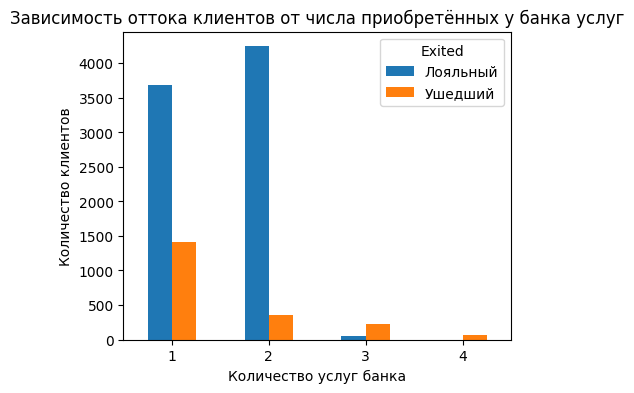

In [ ]:
# делаем сводную таблицу
pivot_1 = df.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Exited',
    aggfunc='count'
)
fig_7, axes_7 = plt.subplots(figsize=(5,4)) # Создание области для рисунка и осей
pivot_1.plot(
    kind='bar',
    ax=axes_7
);
axes_7.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг');
axes_7.set_xlabel('Количество услуг банка');
axes_7.set_ylabel('Количество клиентов');
axes_7.xaxis.set_tick_params(rotation=360)

- отток клиентов уменьшается на 2 и более приобретенных услуг

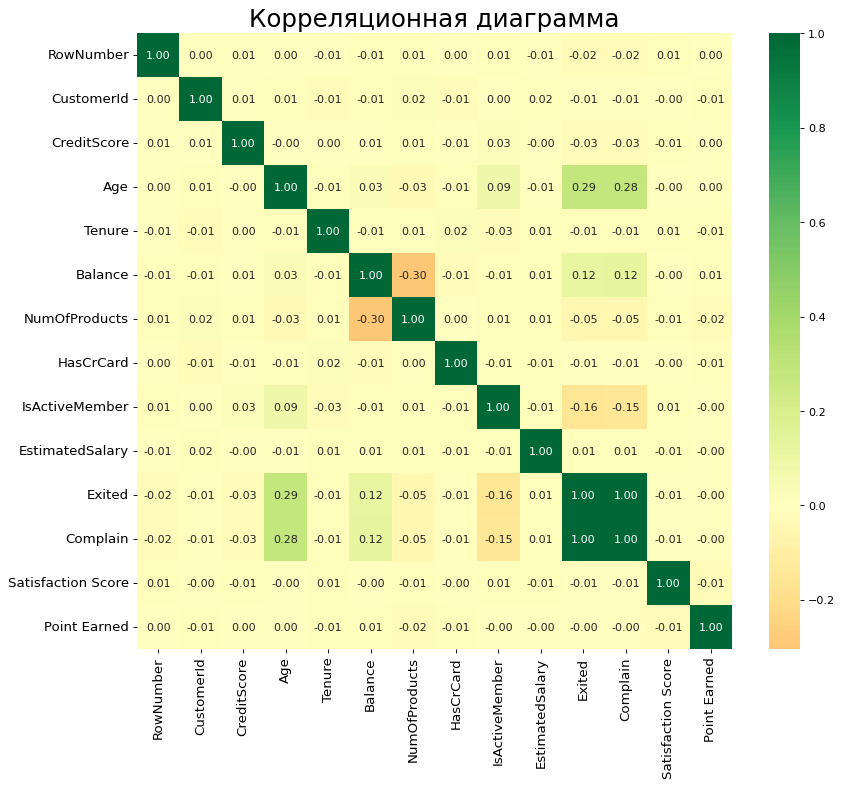

In [ ]:
#строим корреляционную диаграмму
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corel.corr(numeric_only=True),cmap='RdYlGn',fmt=".2f", center=0, annot=True)# возвращает корреляционную матрицу только для числовых столбцов


plt.title('Корреляционная диаграмма', fontsize=22)
plt.xticks(fontsize=12)#метки осей
plt.yticks(fontsize=12)#метки осей
plt.show()

*По таблице видно, что наибольшая корреляция с показателем оттока клиентов*
- age возраст мы видели это на графике гистограммы, и наблюдаем на этом графике связь между возрастом и оттоком клиентов
- balanse
- isActiveMember статус активного клиента
- Complain жалобы клиентов
- NumOfProducts кол-во услуг в банке

#### **модель логистической регрессии**

In [ ]:
cs.columns # выведем название столбцов  для копирования

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'Age_group'],
      dtype='object')

In [ ]:
x = logistic_Regression[['Age', 'Tenure',
       'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]
y = logistic_Regression['Exited']

In [ ]:
#разделить данные для проверки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train) #обучения модели логистической регрессии


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
lr.score(x_train, y_train)# оценкa коэффициентом детерминации главной  выборки

0.8109763720465059

In [ ]:
lr.score(x_test, y_test)# оценкa коэффициентом детерминации тестовой выборки

0.8145

Значение 0,8 указывает на приемлемую точность модели

In [ ]:
y_pred = lr.predict(x_test)
confusion_matrix(y_test, y_pred)


array([[1577,   28],
       [ 343,   52]])

Результат показывает, что у нас 1577+52 верных прогнозов и 28+343 ошибочных

Видим что прогноз результатов тестового набора и вычисление точности показывают хорошую точность самой модели.
Коэффициентом детерминации тестовой выборки  и главной выборки схожи это нам говорит что выборка репрезентативна.
коэффициентом детерминации 0,8 указывает на приемлемую точность модели.   
**Вывод:** Логистическая модель показала себя хорошо поэтому на основе ее можно предсказывать переменную 'Exited'.

##### **Заключение**
**Итог:**
- возраст ушедших клиентов сосредоточен 38-51год
- баланс ушедших клиентов больше
- неактивные пользователи чаще уходят
- у ушедших клиентов большое кол-во жалоб
- чем меньше услуг использует клиент, тем больше увеличивается отток клиентов

**Вывод:**
- обратить на клиентов от 38 - 51 года, проработать индивидуальный подход, обрабатывать все жалобы.
- проработать качество обслуживания, условия обслуживания, а также программы лояльности
- мониторить рынок услуг, делать специальные предложения клиентам
- предоставление дополнительных услуг и сервисов
- организация мероприятий и акций
- клиенты с 0 счетом убедить их в надежности банка, предоставить хорошие условия по вкладам, получать отзывы от клиентов,обеспечить качественное обслуживание. Проработать ожидания клиента, на этом строить предложения клиенту.

